## GRAFICA DE TODOS LOS IDIOMAS

In [4]:
import pickle

    
with open('language_activites.pkl', 'rb') as x:
    language_activities= pickle.load(x)

print("El diccionario language_activities ha sido cargado correctamente.")

El diccionario language_activities ha sido cargado correctamente.


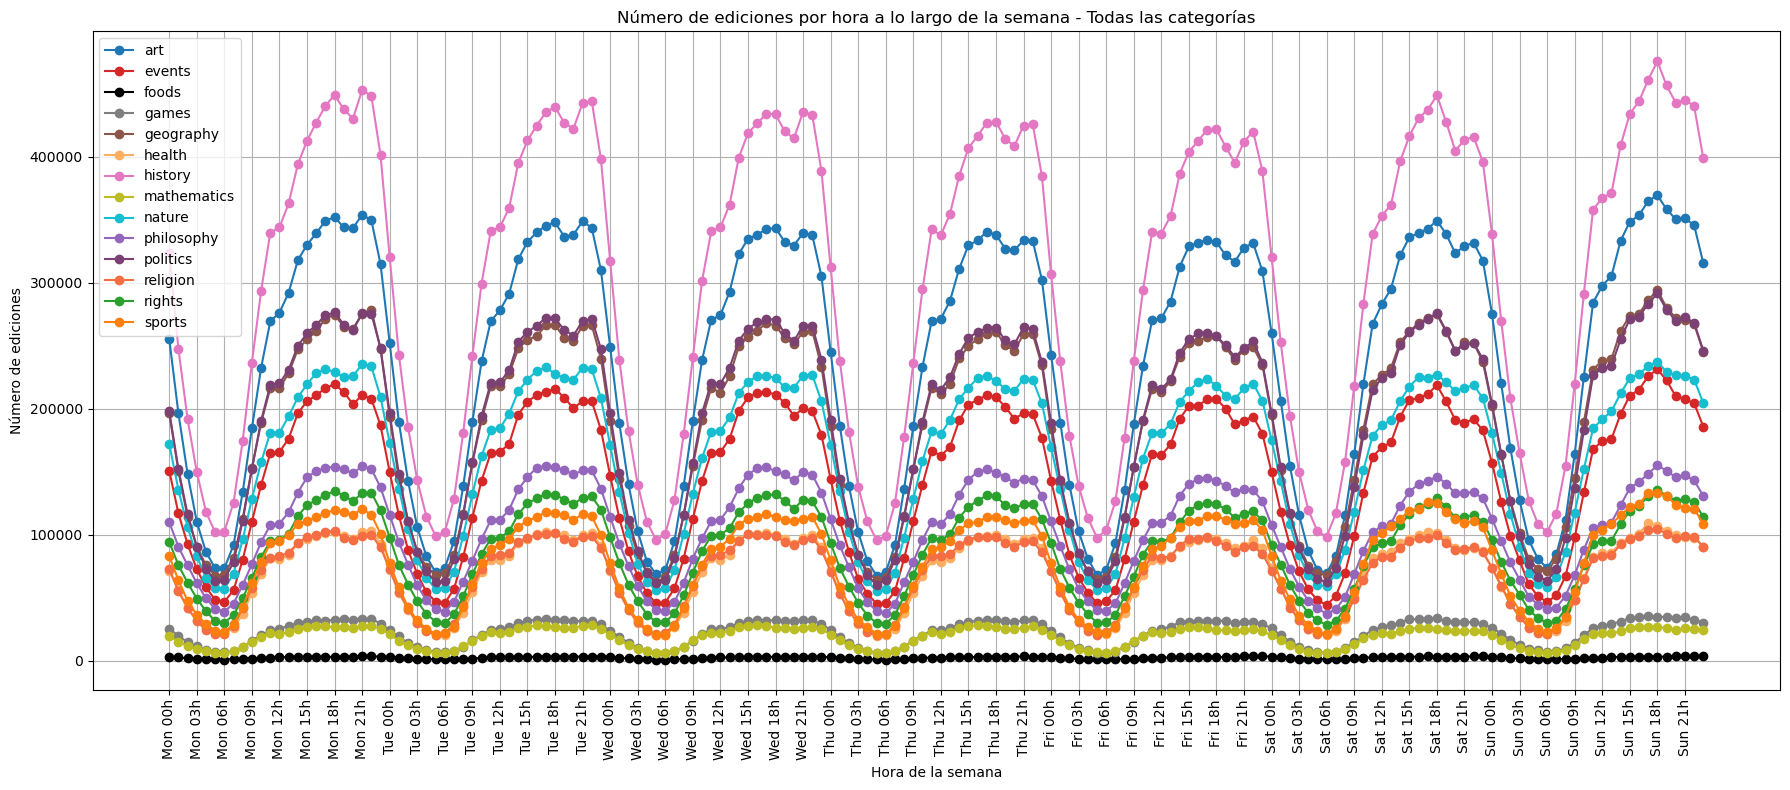

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que ya tienes el diccionario language_activities cargado con los datos

# Diccionario de colores para cada categoría con colores específicos
color_dict = {
    'art': '#1f77b4',        # Azul
    'sports': '#ff7f0e',     # Naranja
    'rights': '#2ca02c',     # Verde
    'events': '#d62728',     # Rojo
    'philosophy': '#9467bd', # Púrpura
    'geography': '#8c564b',  # Marrón
    'history': '#e377c2',    # Rosa
    'games': '#7f7f7f',      # Gris
    'mathematics': '#bcbd22',# Oliva
    'nature': '#17becf',     # Cian
    'politics': '#7b4173',   # Magenta oscuro
    'health': '#fdae61',     # Amarillo anaranjado
    'religion': '#f46d43',   # Naranja rojizo
    'food': '#66c2a5'        # Verde agua
}

# Crear un diccionario para almacenar la data unificada por categoría
combined_activities = {}

# Unificar las series de datos por categoría
for language, categories in language_activities.items():
    for category, activity in categories.items():
        if category not in combined_activities:
            combined_activities[category] = activity.copy()
        else:
            combined_activities[category] = combined_activities[category].add(activity, fill_value=0)

# Crear el gráfico unificado
plt.figure(figsize=(18, 8))
for category, activity in combined_activities.items():
    hours_extended = np.tile(np.arange(24), 7) + np.repeat(np.arange(7) * 24, 24)
    edits = activity.values.flatten()
    plt.plot(hours_extended, edits, marker='o', linestyle='-', color=color_dict.get(category, 'black'), label=category)

plt.title('Número de ediciones por hora a lo largo de la semana - Todas las categorías')
plt.xlabel('Hora de la semana')
plt.ylabel('Número de ediciones')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 7*24, 3), [f'{d} {h:02d}h' for d in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] for h in range(0, 24, 3)], rotation=90)
plt.tight_layout()
plt.show()


## GRAFICAS POR IDIOMAS

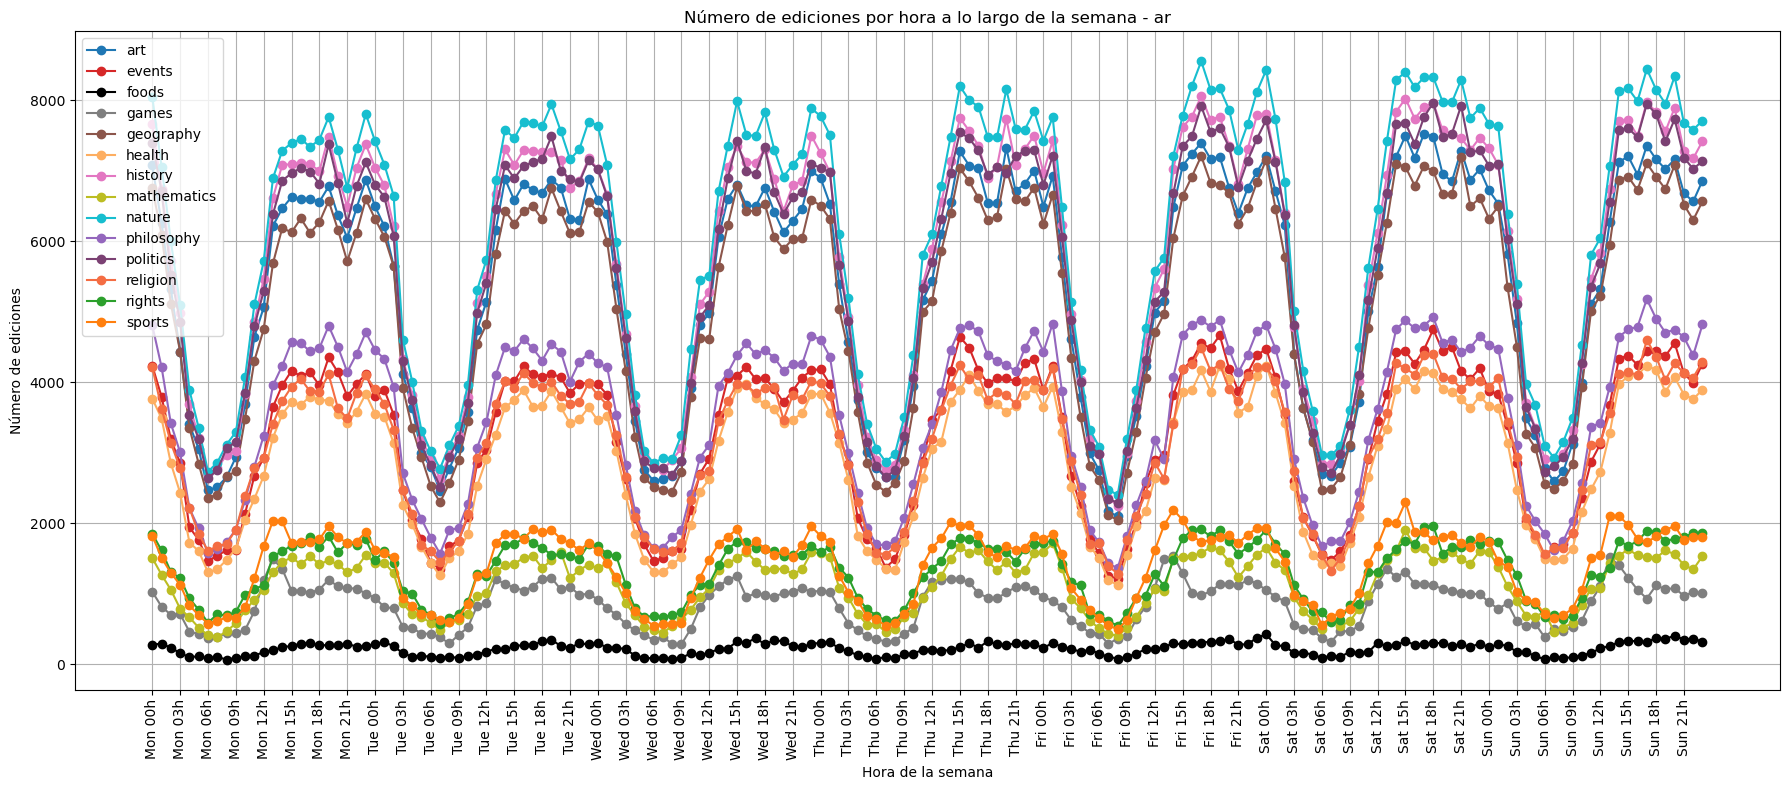

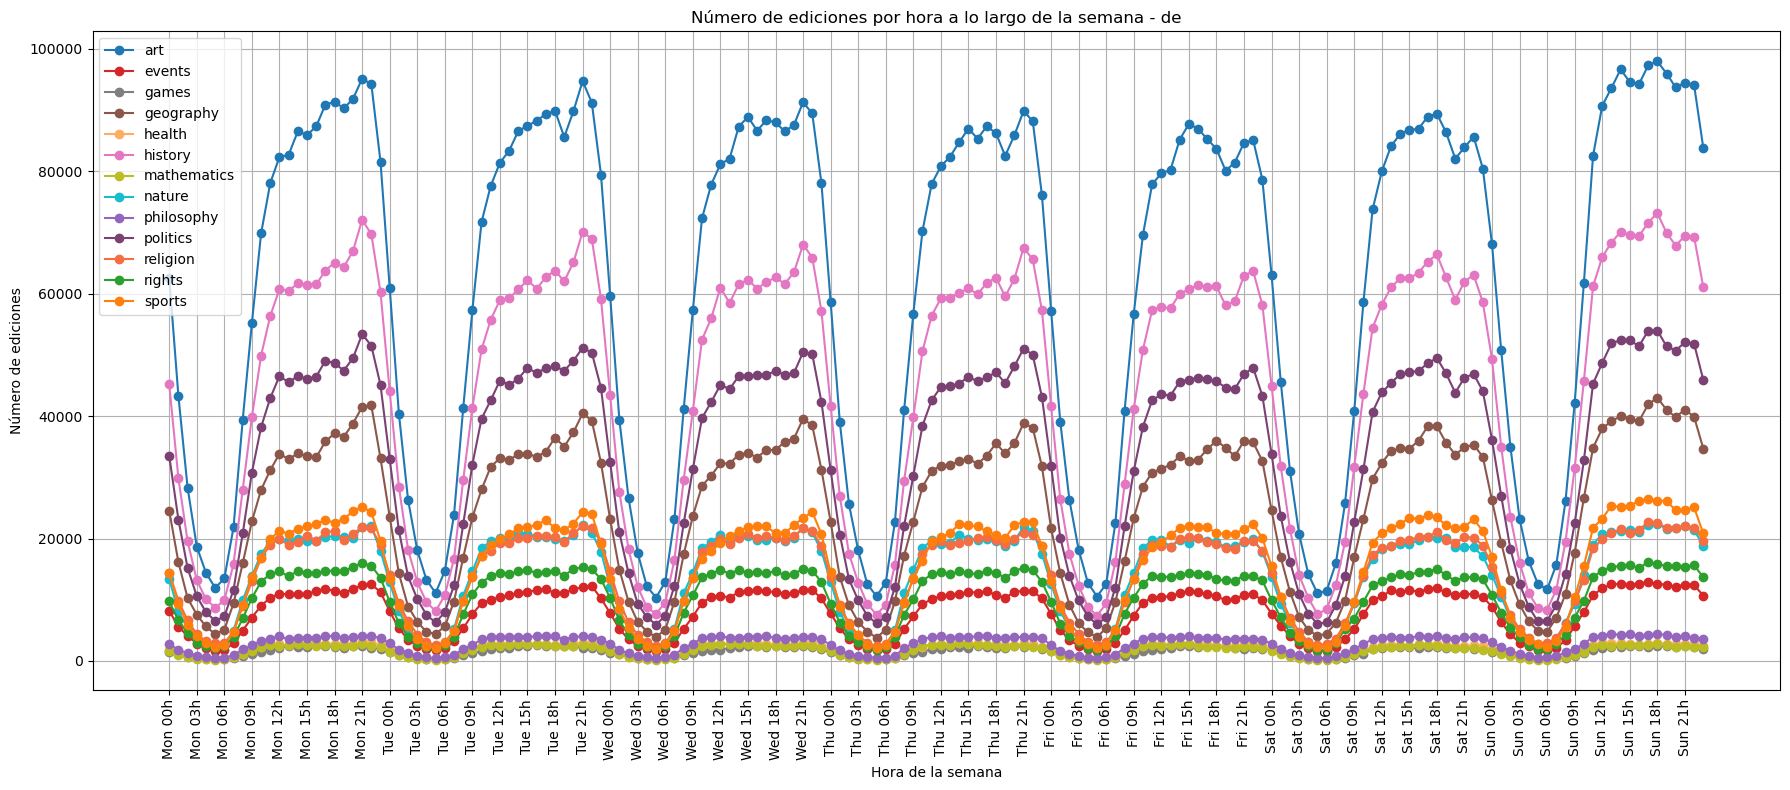

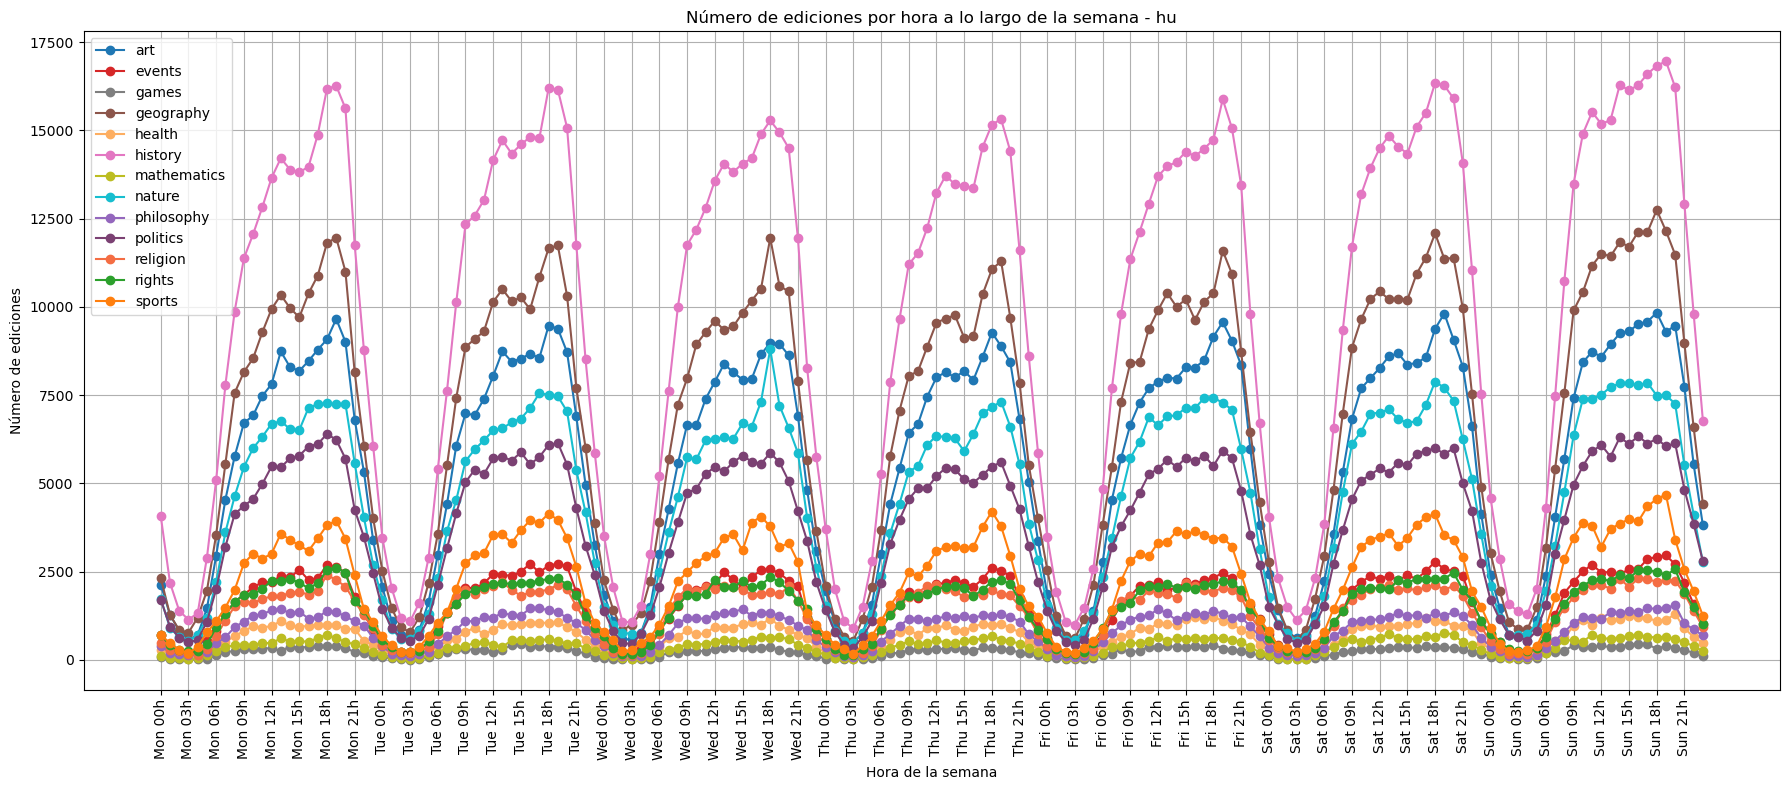

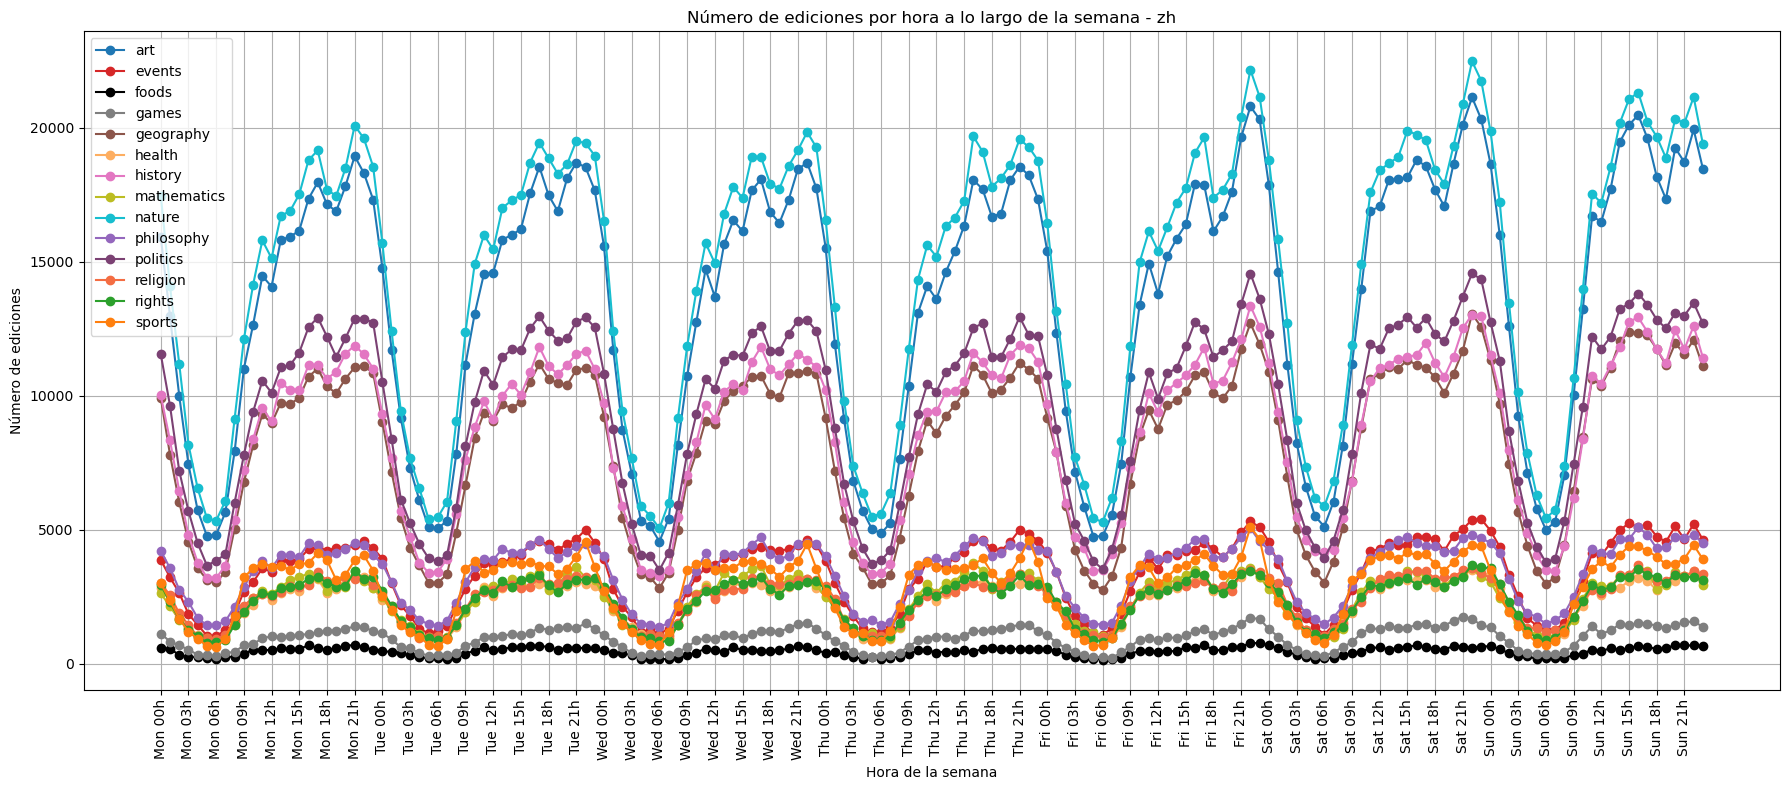

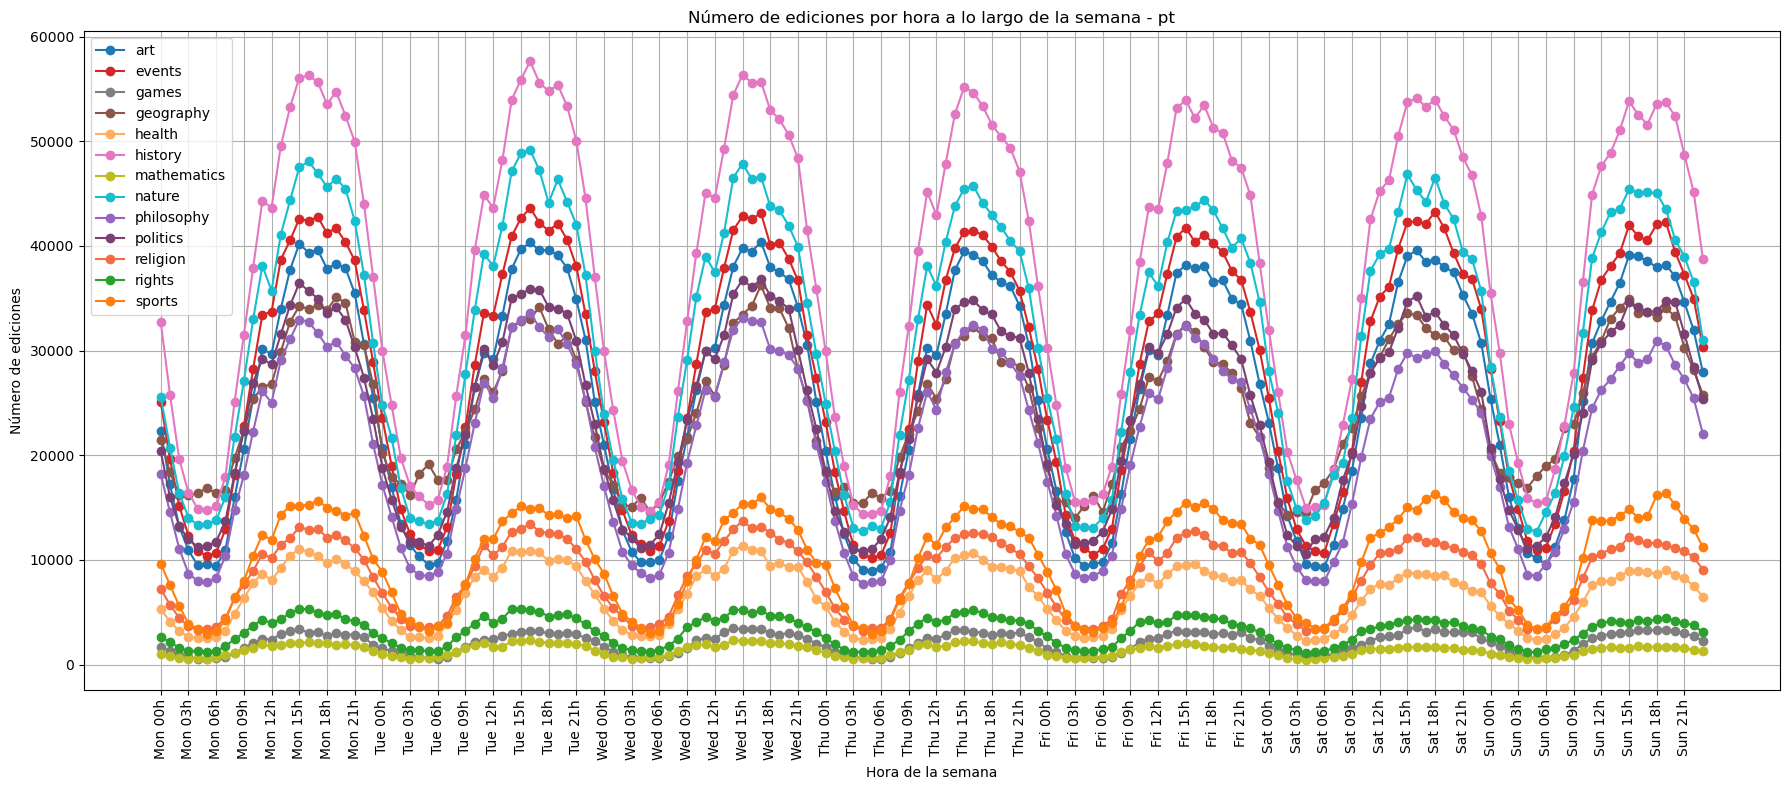

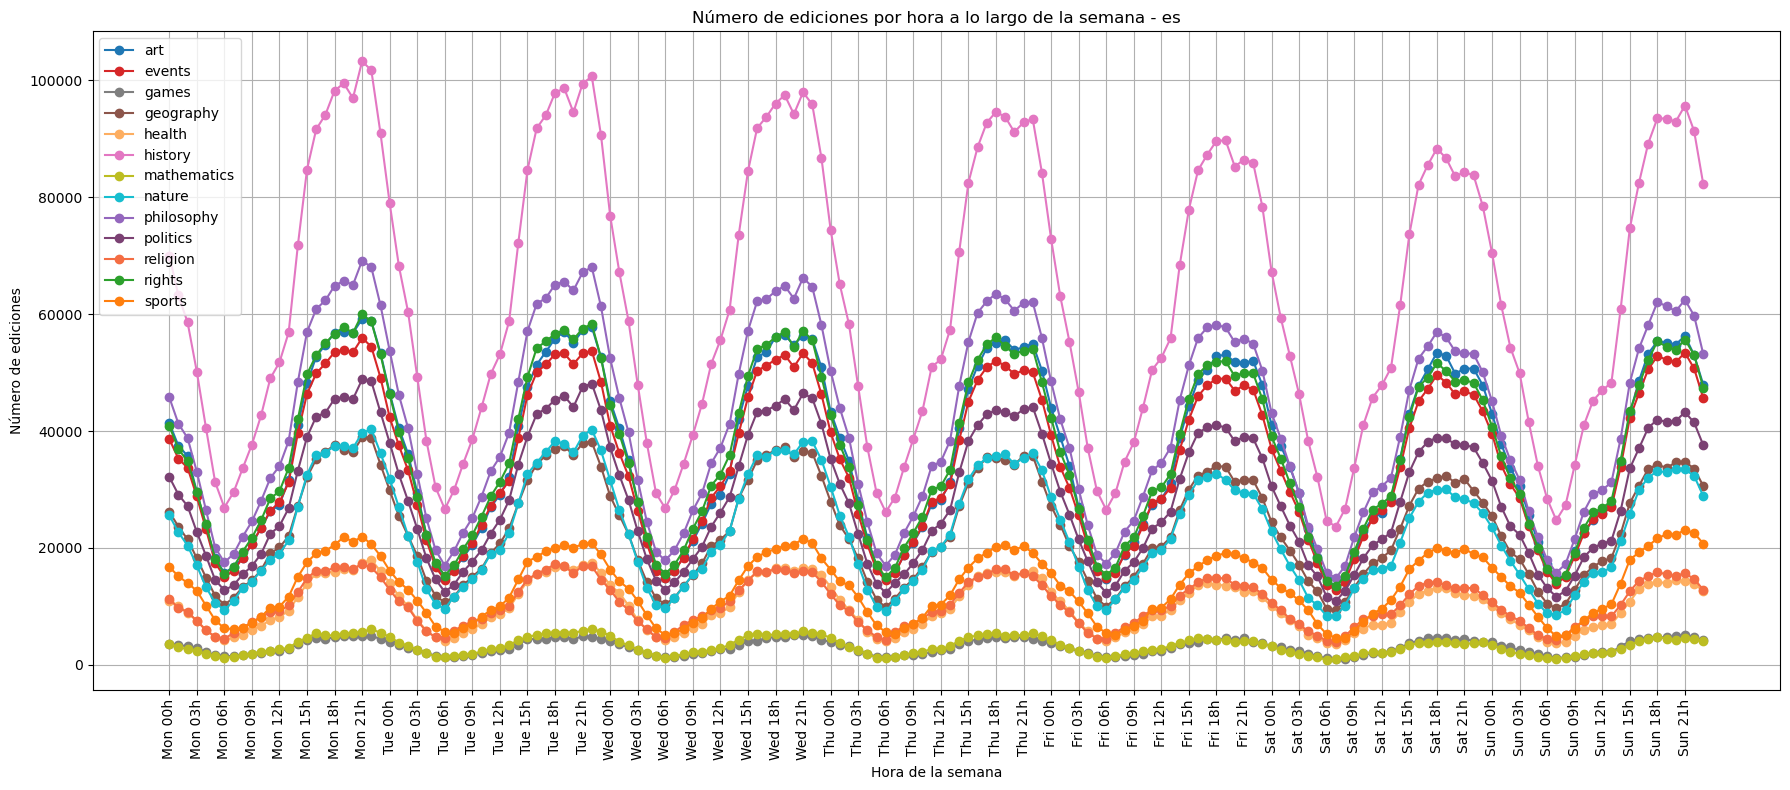

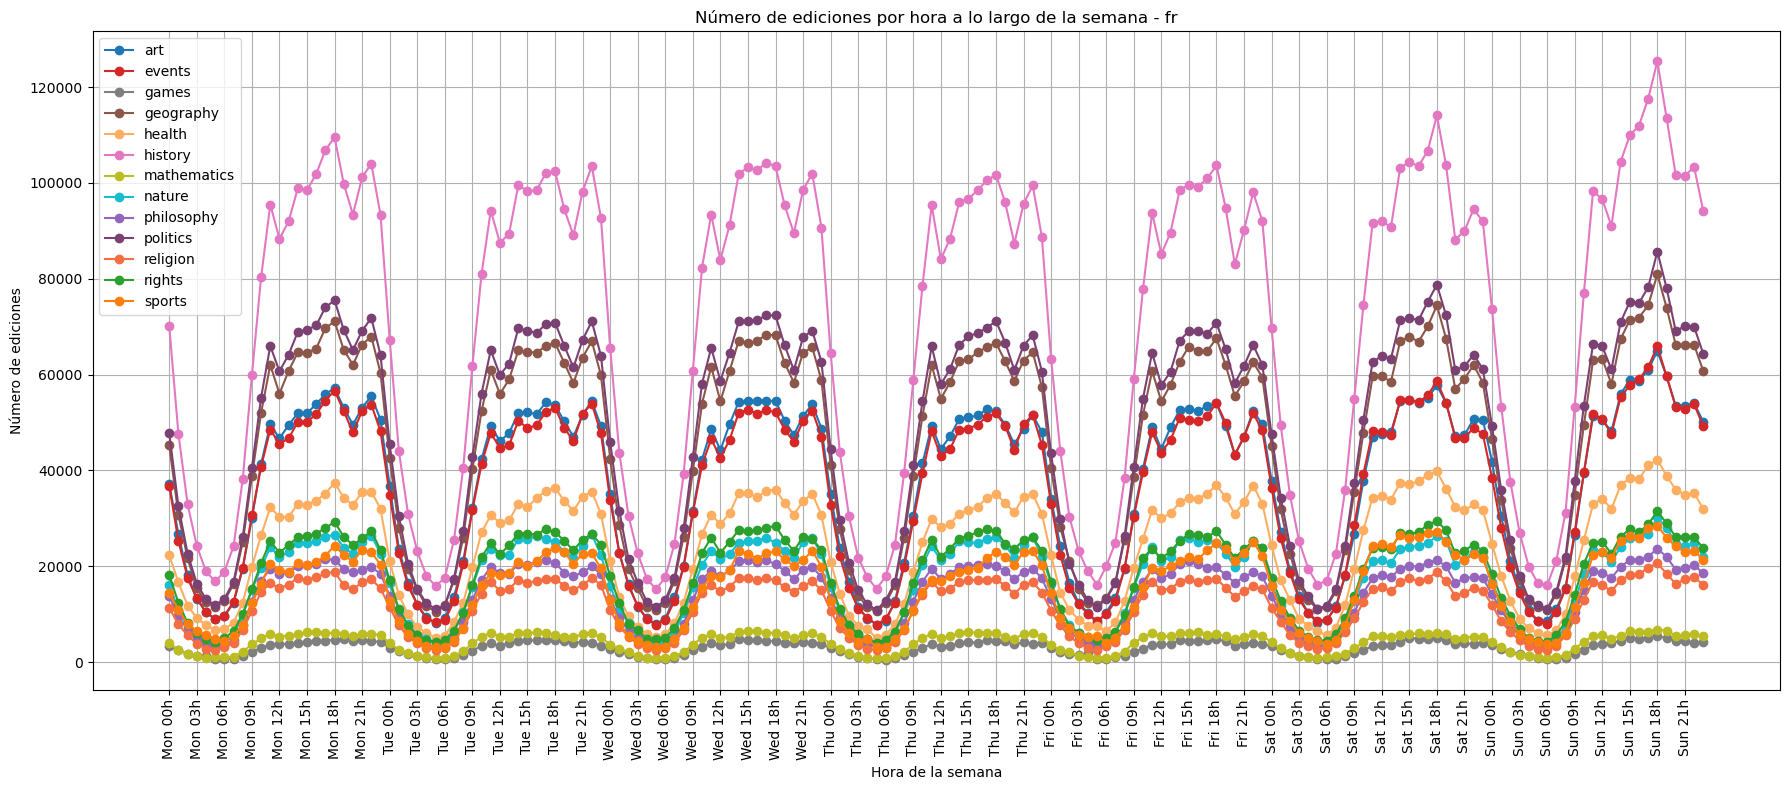

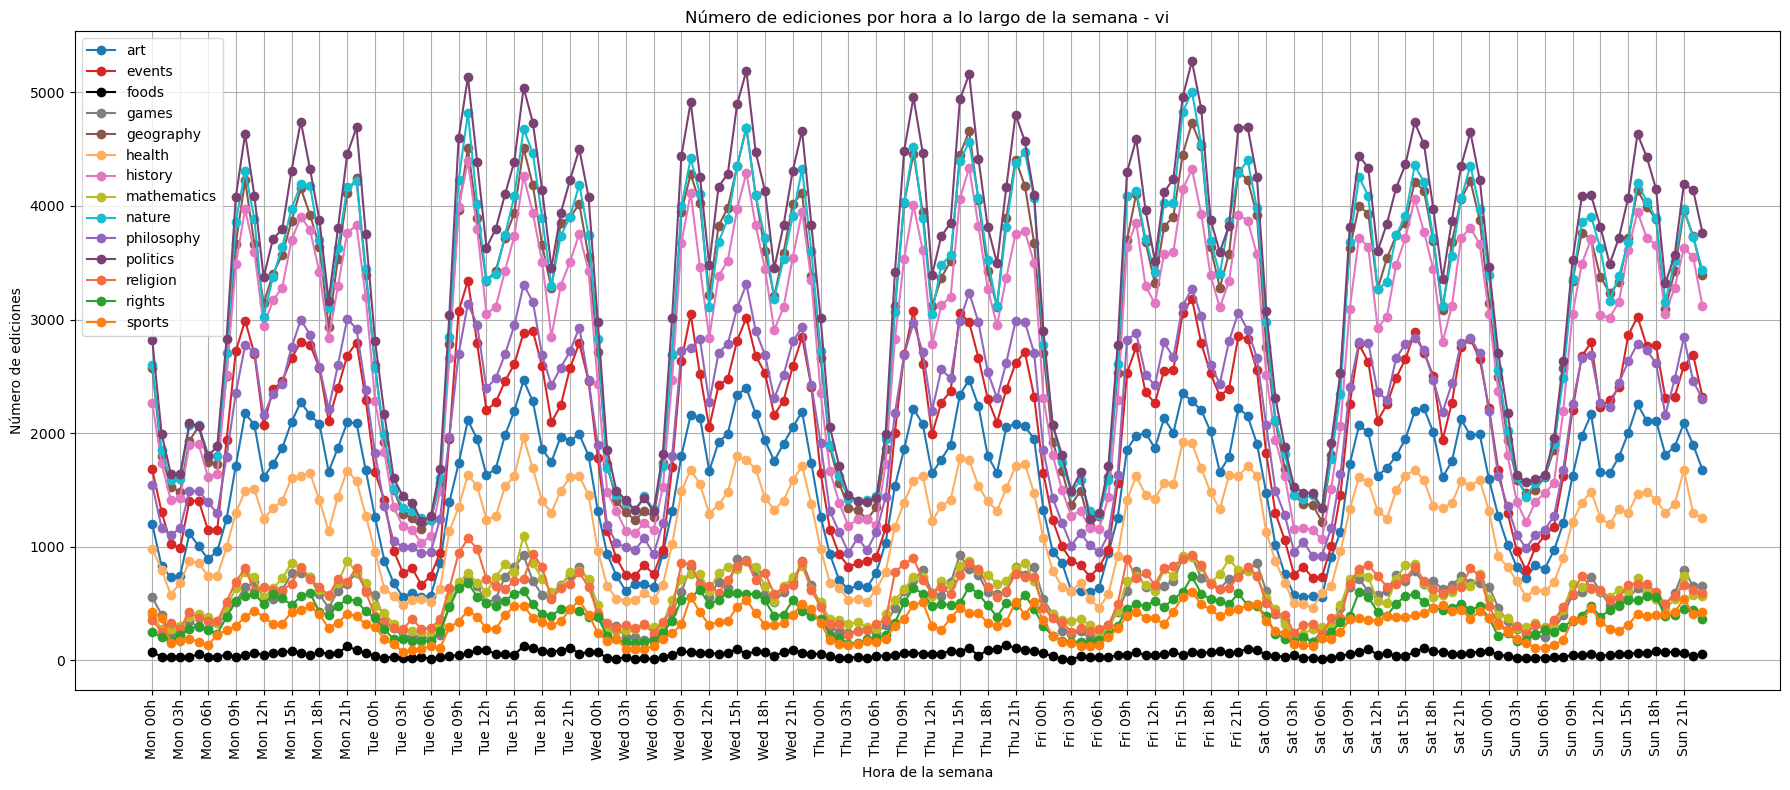

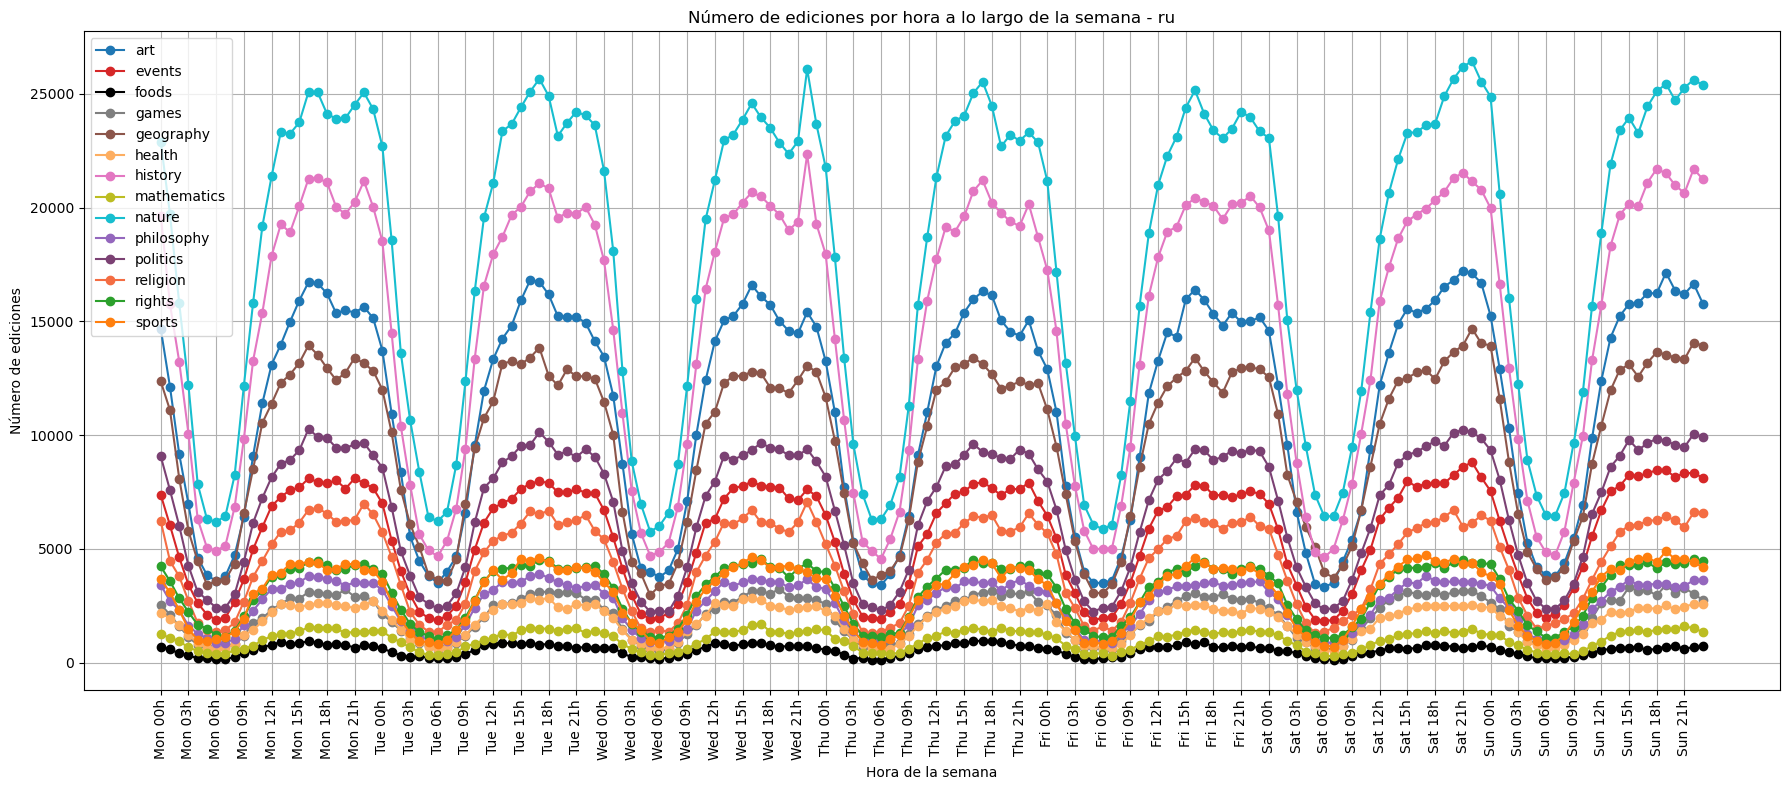

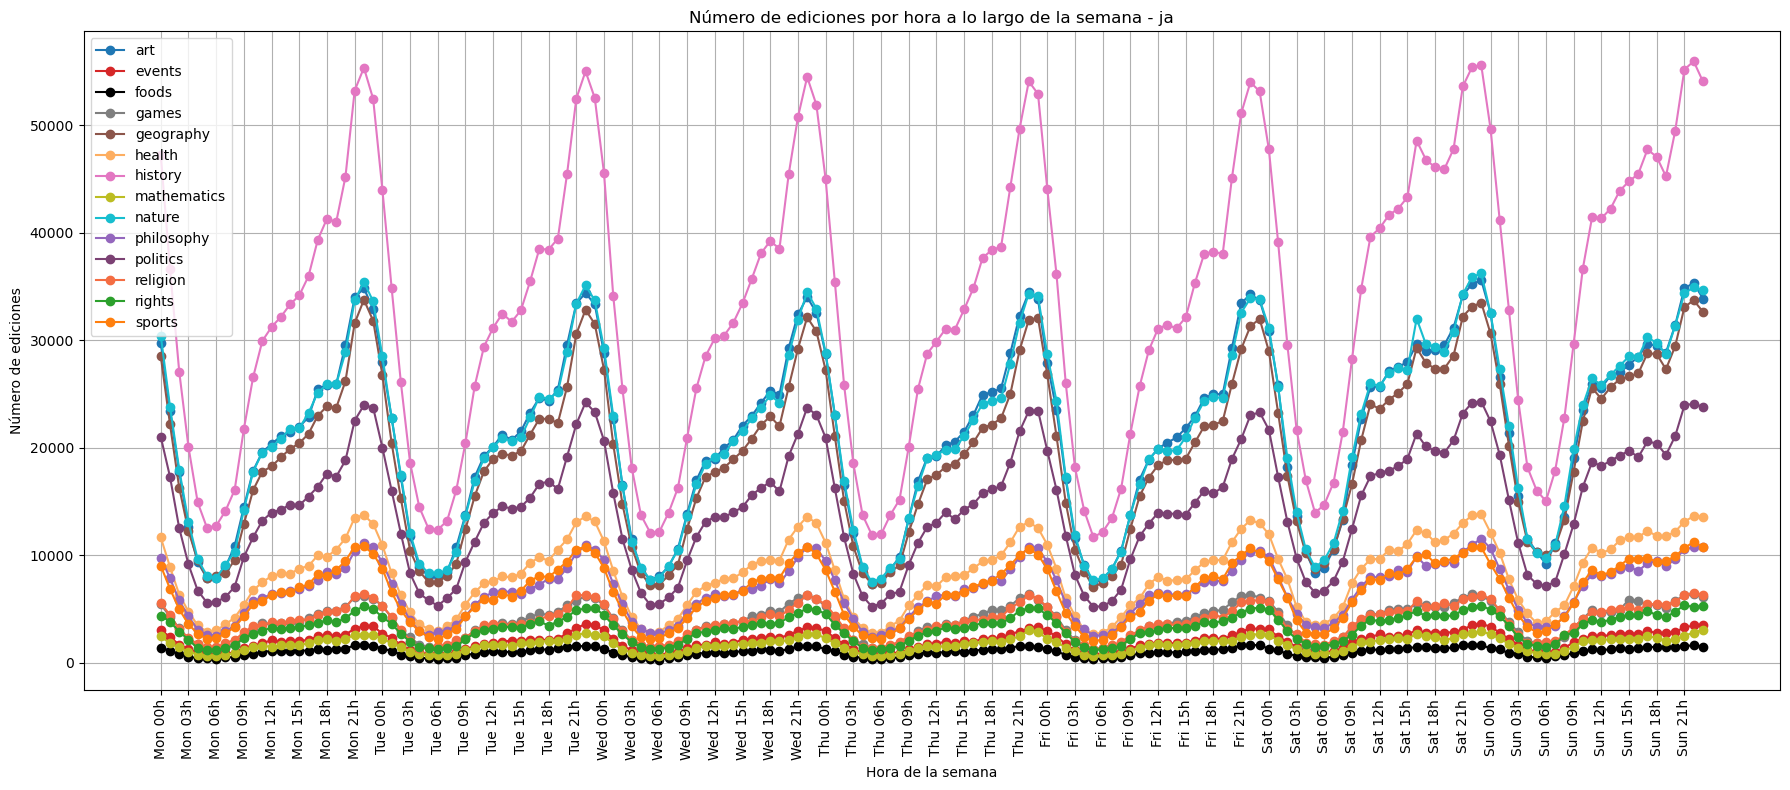

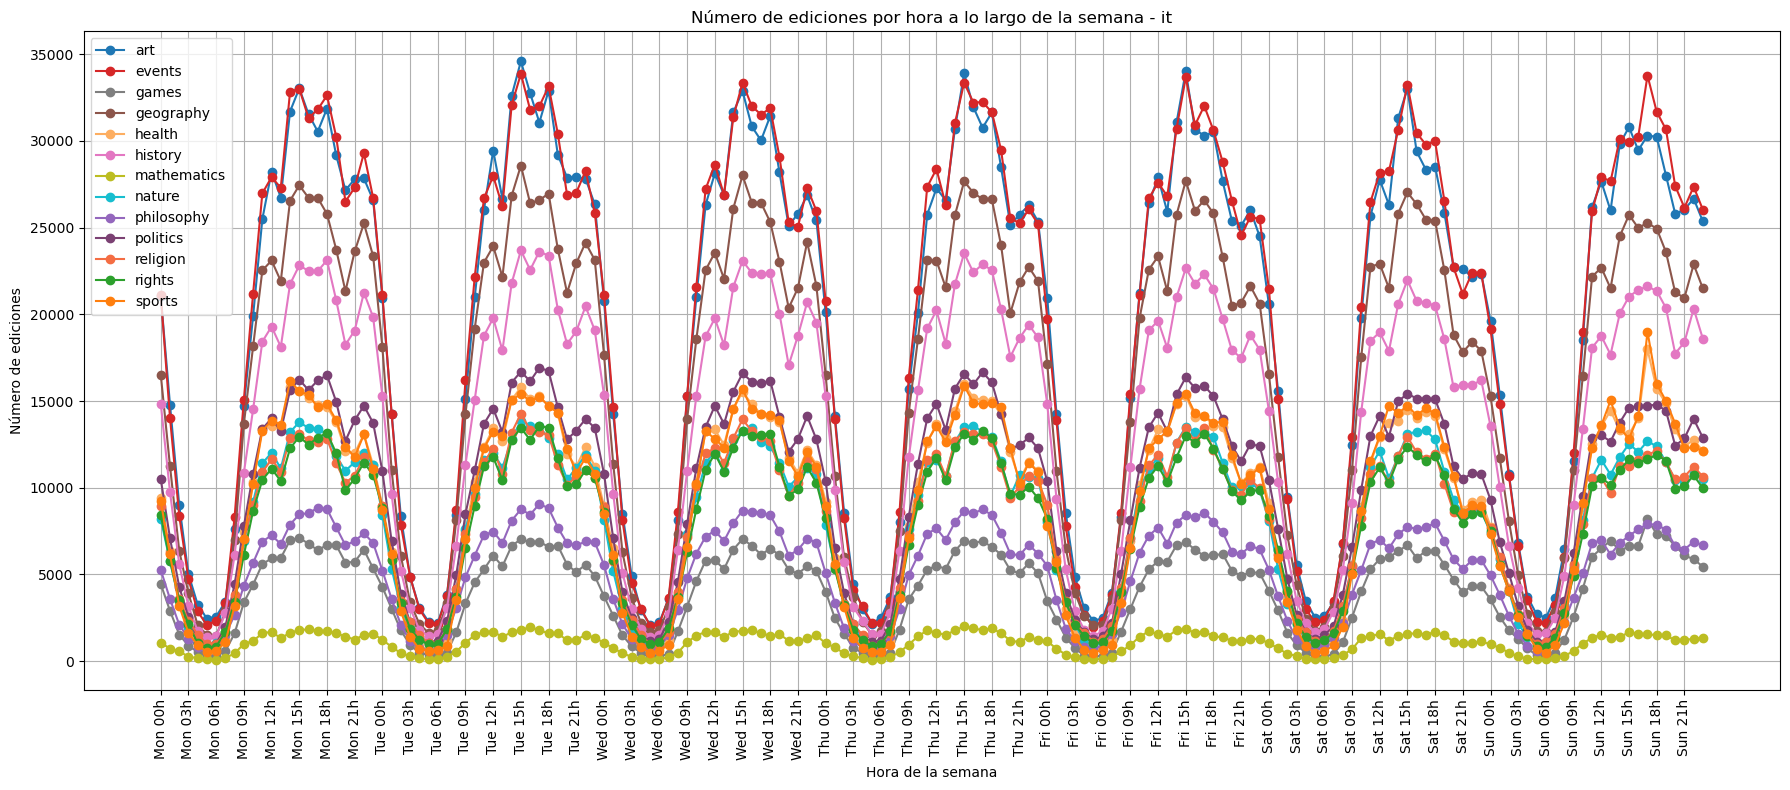

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Diccionario de zonas horarias
timezone_dict = {
    'ar': 'Asia/Riyadh',
    'de': 'Europe/Berlin',
    'hu': 'Europe/Budapest',
    'zh': 'Asia/Shanghai',
    'es': 'Europe/Madrid',
    'fr': 'Europe/Paris',
    'vi': 'Asia/Ho_Chi_Minh',
    'ru': 'Europe/Moscow',
    'ja': 'Asia/Tokyo',
    'it': 'Europe/Rome',
    'pt': 'America/Sao_Paulo'
}

# Diccionario de traducción
translation_dict = {
    'arte': 'art',
    'deporte': 'sports',
    'derecho': 'rights',
    'eventos': 'events',
    'filosofia': 'philosophy',
    'geografia': 'geography',
    'historia': 'history',
    'juegos': 'games',
    'matematica': 'mathematics',
    'naturaleza': 'nature',
    'politica': 'politics',
    'salud': 'health',
    'desportos': 'sports',
    'direito': 'rights',
    'jogos': 'games',
    'natureza': 'nature',
    'religiao': 'religion',
    'saude': 'health'
}

# Diccionario de colores para cada categoría
color_dict = {
    'art': 'blue',
    'sports': 'orange',
    'rights': 'green',
    'events': 'red',
    'philosophy': 'purple',
    'geography': 'brown',
    'history': 'pink',
    'games': 'gray',
    'mathematics': 'olive',
    'nature': 'cyan',
    'politics': 'magenta',
    'health': 'yellow',
    'religion': 'black'
}

directory = 'converted'  # Asegúrate de que el directorio es correcto
language_activities = {}  # Diccionario para guardar las actividades de cada idioma

# Loop a través de cada archivo en el directorio
for file in os.listdir(directory):
    if file.startswith('df_'):
        language = file.split('_')[1].split('.')[0]  # Extrae el idioma del nombre del archivo
        print('Reading File:', file)
        
        # Cargar el dataframe
        path = os.path.join(directory, file)
        df = pd.read_pickle(path)

         # Convertir 'datetime' a objetos datetime
        if language == 'pt':
            df['datetime'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ', utc=True)
        else:
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
        
        # Convertir la hora a la zona horaria del idioma
        df['datetime'] = df['datetime'].dt.tz_convert(timezone_dict[language])

        # Convertir 'datetime' a objetos datetime
        df['datetime'] = pd.to_datetime(df['datetime'])
        df['day_of_week'] = df['datetime'].dt.dayofweek
        df['hour'] = df['datetime'].dt.hour

        # Explode en la columna 'categories' para separar las categorías
        df = df.explode('categories')

        # Traducir las categorías usando el diccionario de traducción
        df['categories'] = df['categories'].map(translation_dict).fillna(df['categories'])

        # Agrupar por categoría, día de la semana y hora, y contar las ediciones
        category_activity = df.groupby(['categories', 'day_of_week', 'hour']).size().unstack(level=0, fill_value=0)

        # Almacenar la actividad por categoría en el diccionario
        if language not in language_activities:
            language_activities[language] = {}
        for category in category_activity.columns:
            if category not in language_activities[language]:
                language_activities[language][category] = category_activity[category]

# Crear gráficos por cada idioma
for language, categories in language_activities.items():
    plt.figure(figsize=(18, 8))
    for category, activity in categories.items():
        hours_extended = np.tile(np.arange(24), 7) + np.repeat(np.arange(7) * 24, 24)
        edits = activity.values.flatten()
        plt.plot(hours_extended, edits, marker='o', linestyle='-', color=color_dict.get(category, 'black'), label=category)

    plt.title(f'Número de ediciones por hora a lo largo de la semana - {language}')
    plt.xlabel('Hora de la semana')
    plt.ylabel('Número de ediciones')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(0, 7*24, 3), [f'{d} {h:02d}h' for d in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] for h in range(0, 24, 3)], rotation=90)
    plt.tight_layout()
    plt.show()


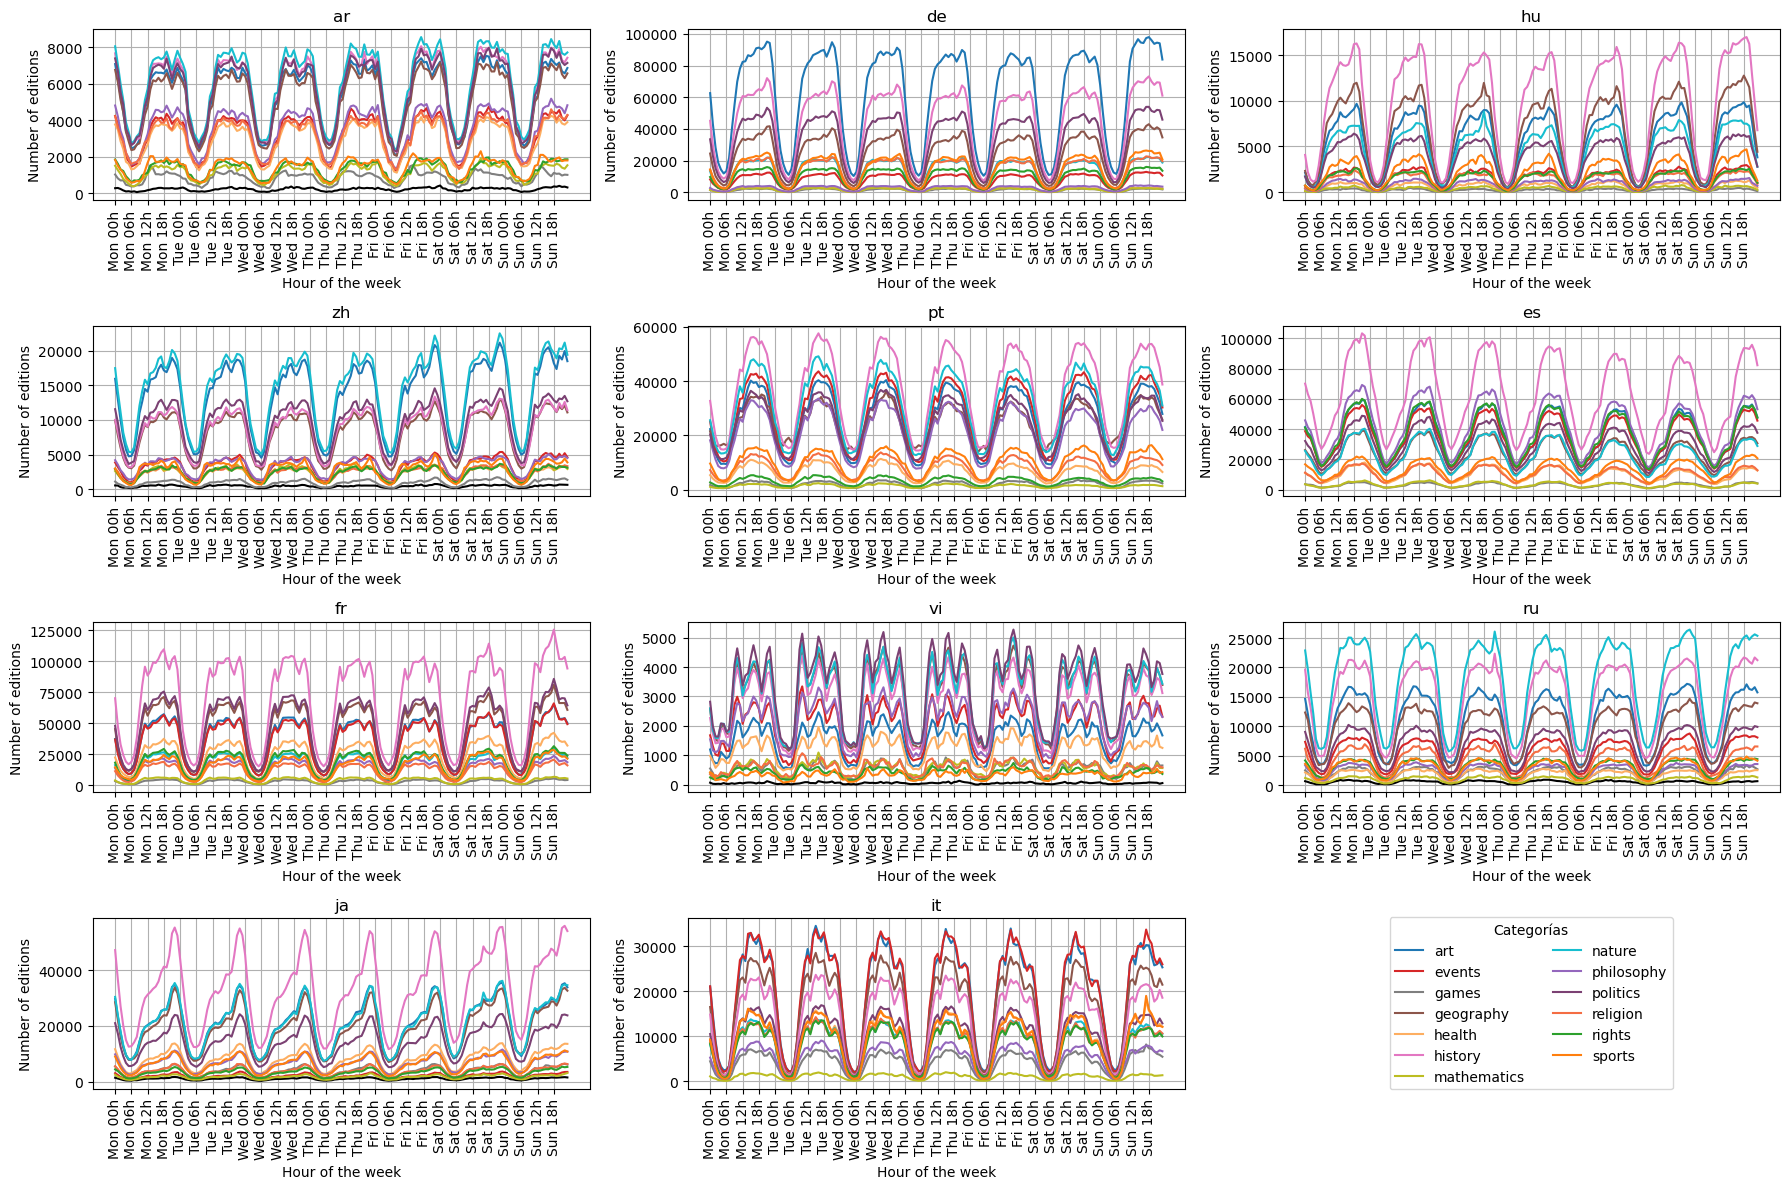

In [6]:

fig, axes = plt.subplots(4, 3, figsize=(18, 12))

# Iterar sobre los idiomas y crear los gráficos
for i, (language, categories) in enumerate(language_activities.items()):
    ax = axes.flat[i]
    for category, activity in categories.items():
        hours_extended = np.tile(np.arange(24), 7) + np.repeat(np.arange(7) * 24, 24)
        edits = activity.values.flatten()
        ax.plot(hours_extended, edits, linestyle='-', color=color_dict.get(category, 'black'), label=category)
    ax.set_title(f'{language}')
    ax.set_xlabel('Hour of the week')
    ax.set_ylabel('Number of editions')
    ax.grid(True)
    ax.set_xticks(np.arange(0, 7*24, 6))
    ax.set_xticklabels([f'{d} {h:02d}h' for d in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] for h in range(0, 24, 6)], rotation=90)

# Ocultar el último subplot (11 idiomas = 12 subplots, uno estará vacío)
axes.flat[-1].axis('off')

# Agregar la leyenda en el subplot vacío
handles, labels = ax.get_legend_handles_labels()
axes.flat[-1].legend(handles, labels, loc='center', title='Categorías', ncol=2)

# Ajustar el diseño
plt.tight_layout()
plt.show()